<a href="https://colab.research.google.com/github/Q-nicorn1/Q-nicorn1.github.io/blob/master/Linearregression_DiamondPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Use Diamond price dataset from Kaggle https://www.kaggle.com/shivam2503/diamonds/data#__sid=js0: to do the assigned taks

Use multivariate linear model to see if you can predict diamond price

Determine optimal number of features to predict on

Try to use polynomial features on at least one column

Deliberately underfit / overfit the data and see what happens

Credit to https://medium.com/@sp7091/regression-approaches-to-predict-diamond-price-258478a485c9, with the help of this post, I was able to understand and apply linear regression model . 

In [ ]:
#load data Thanks Dan Koban for downloading the data to the class file
from google.colab import drive
drive.mount('/data/')
data_dir = '/data/My Drive/EMSE 6575/LinearRegressionHomework'


Drive already mounted at /data/; to attempt to forcibly remount, call drive.mount("/data/", force_remount=True).


In [ ]:
#essential pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
#read data
data = pd.read_csv(data_dir + '/diamonds.csv')

data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


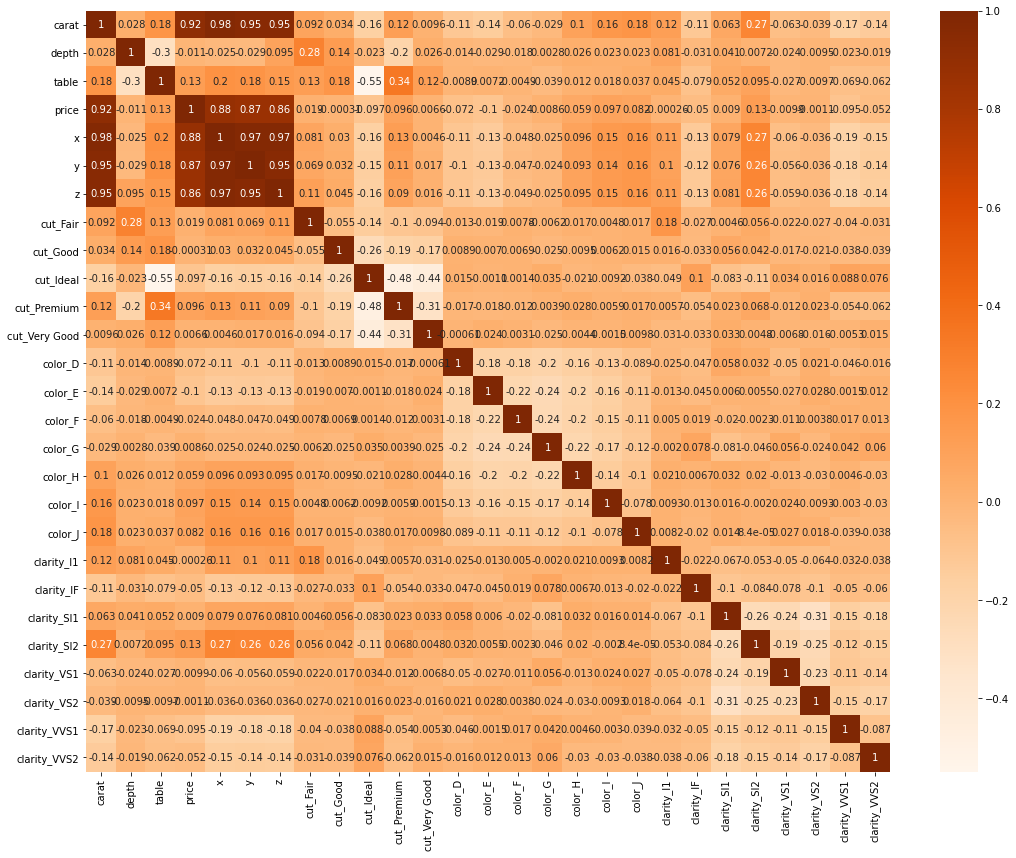

In [ ]:
#explore and determine which features are the most relatable to price
plt.figure(figsize = (18,14))
sns.heatmap(data_ohe.corr(),annot = True , cmap = 'Oranges' )


In [ ]:
#dummy code data
from sklearn.preprocessing import StandardScaler
data_ohe = pd.get_dummies(data)

#drop some features
data.drop(columns = ['cut', 'color', 'clarity', 'depth', 'table'], axis = 1, inplace = True)
data_ohe = pd.get_dummies(data)
df = data_ohe.loc[(data[['x','y','z']]!=0).all(axis=1)]

data_ohe.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
data_ohe.head()

,carat,price,x,y,z
0,0.23,326,3.95,3.98,2.43
1,0.21,326,3.89,3.84,2.31
2,0.23,327,4.05,4.07,2.31
3,0.29,334,4.20,4.23,2.63
4,0.31,335,4.34,4.35,2.75


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Rsquare: 0.848138
     Variable         Coeff
0  Unnamed: 0      0.007967
1       carat  10657.689042
2           x   -142.868681
3           y    261.485459
4           z  -2158.574408
Intercept: 2176.927013
rmse: 1538.930860


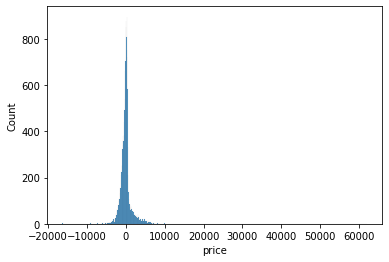

In [ ]:
#build the multivariate regression model then train and evaluate it
X=df.drop(['price'], axis=1)
Y=df['price']

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

reg=linear_model.LinearRegression()
reg.fit(X_train,Y_train)
y_pred=reg.predict(X_test)

Rsquare=r2_score(Y_test,y_pred)
print("Rsquare: %f" %(Rsquare))

coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Variable']
coeff_df["Coeff"] = pd.Series(reg.coef_)
coeff_df.sort_values(by='Coeff', ascending=True)
print(coeff_df)
print("Intercept: %f" %(reg.intercept_))

rmse=mean_squared_error(Y_test,y_pred,squared = False)
print("rmse: %f" %(rmse))



##check normality of the errors##
errors = Y_test - y_pred
sns.histplot(errors)

In [ ]:
#PolynomialFeatures on Carat

from sklearn.preprocessing import PolynomialFeatures

X = data_ohe.drop(columns = ['price','x','y','z'], axis=1)
y = data_ohe['price']

# 80/20 split for the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


poly = PolynomialFeatures(degree = 2)
x_train = poly.fit_transform(X_train)
x_test = poly.fit_transform(X_test)
reg_all = linear_model.LinearRegression()
reg_all.fit(x_train,y_train)
y_pred=reg_all.predict(x_test)

Rsquare=reg_all.score(x_test,y_test)
print("Rsquare: %f" %(Rsquare))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("rmse: %f" %(rmse))


Rsquare: 0.854544
rmse: 1519.349054
